In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_excel('C:/Users/ajjadhav/Downloads/crashdata.xlsx')

In [16]:
df.head()

,Average EuroNCAP Lane Deviation Score,Driver Claim History Rating,No Year no claims,Gender,"Frontal Impact (per 100,000 vehicles)","Rear Impact (per 100,000 vehicles)","Front Offset Impact (per 100,000 vehicles)","Side Impact (per 100,000 vehicles)"
0,-0.84,-0.24,3,Male,54.8,64.5,44.5,52.6
1,-0.38,-0.47,2,Male,62.7,43.7,44.7,52.6
2,0.89,0.59,2,Female,60.6,56.7,70.5,58.0
3,0.71,0.28,2,Female,62.7,56.7,54.7,58.0
4,-0.64,0.03,3,Male,41.6,46.3,38.4,36.3


### With the help of domain knowledge and by some web research what we undertood before doing this analysis is there could be a linear or non linear relationship between the Deviation score with rear and frontal impact.

### Along with this there are some dependant features like Gender,
### Gender could be highly dependant feature as we know there is huge difference between driving skills of Male against female.

### Also one more feature is claim history so using which we can analyze drivers driving or crash history
### using this we can predict future incidents with the help of some predictive model.

### Before building predictive model lets do some descriptive analysis.
### using which we can have some numbers which will be useful for our predictive analysis

### We are making the hypothysis that Imapct will be depend on rest features so lets 
###  build model considering target variable Frontal impact.

In [17]:
df.shape

(600, 8)

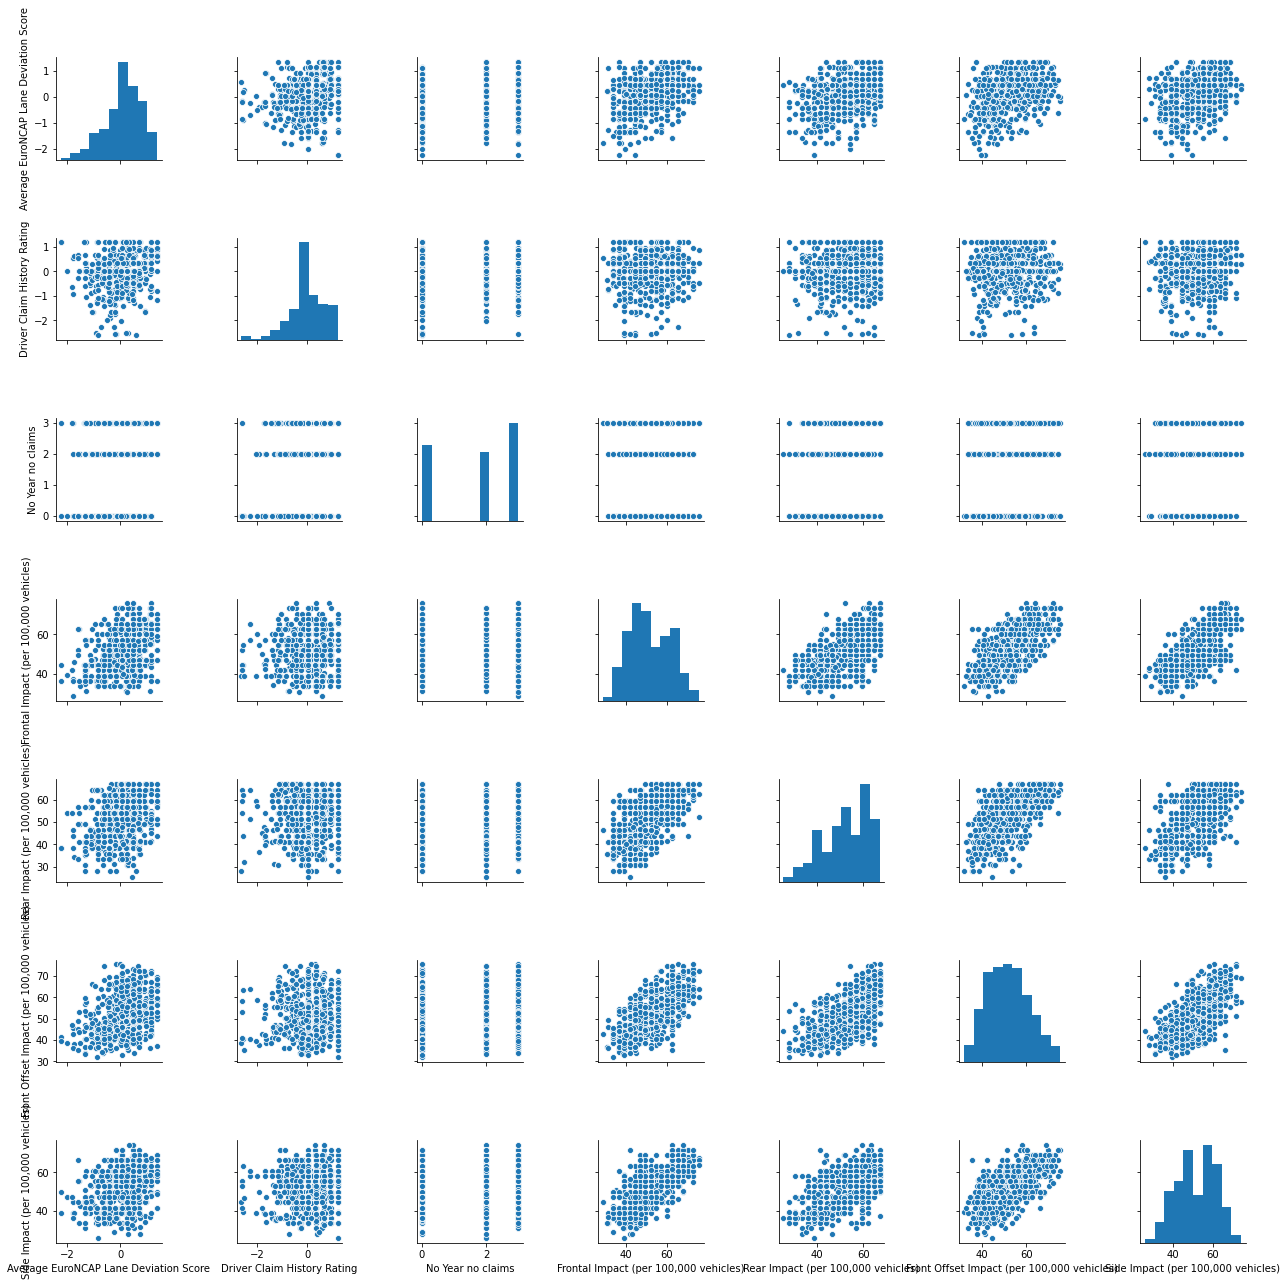

In [18]:
sns.pairplot(df,)

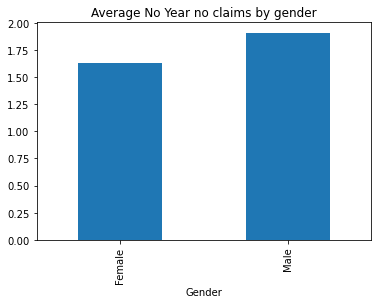

In [19]:
df.groupby('Gender')['No Year no claims'].mean().plot(kind='bar',title= 'Average No Year no claims by gender')

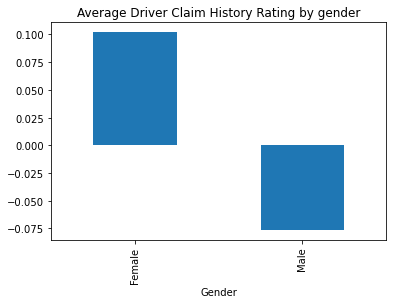

In [20]:
df.groupby('Gender')['Driver Claim History Rating'].mean().plot(kind='bar',title= 'Average Driver Claim History Rating by gender')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E853156B80>,
      dtype=object)

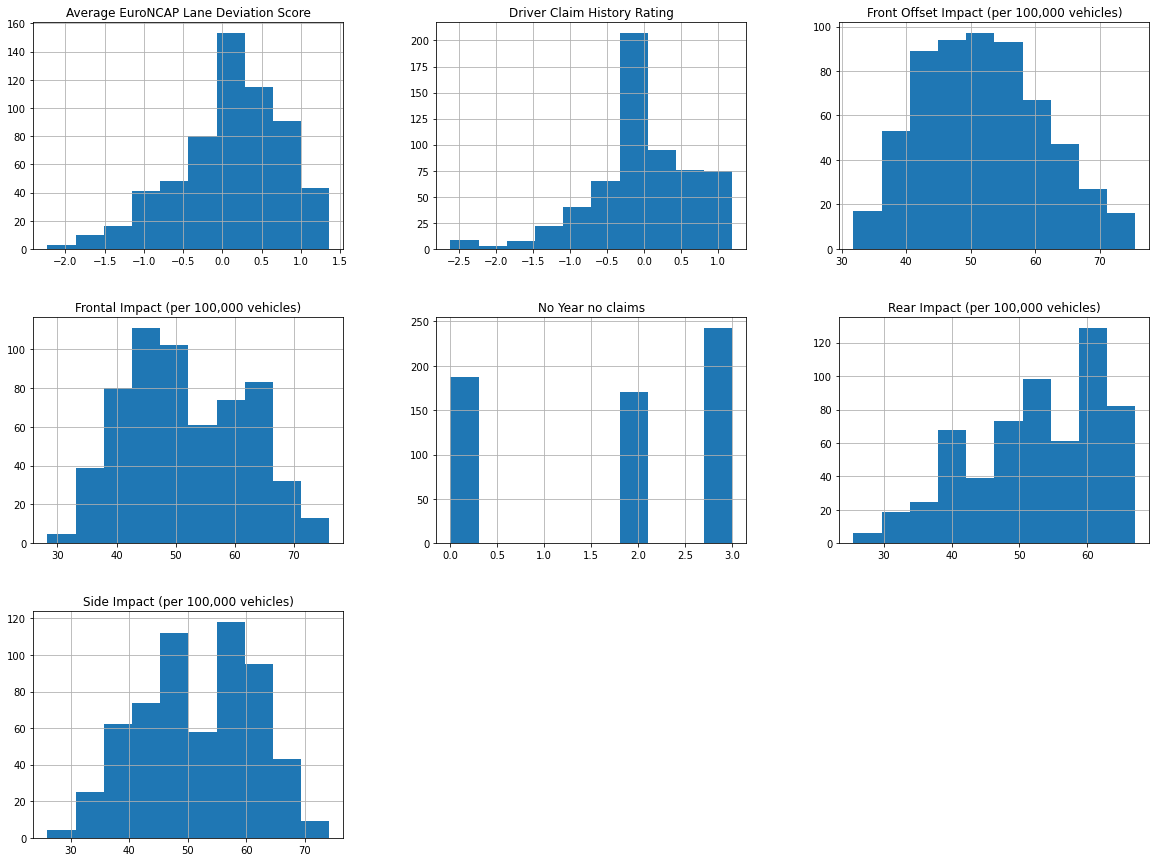

In [21]:
df.hist(figsize = (20, 15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E854224FD0>,
      dtype=object)

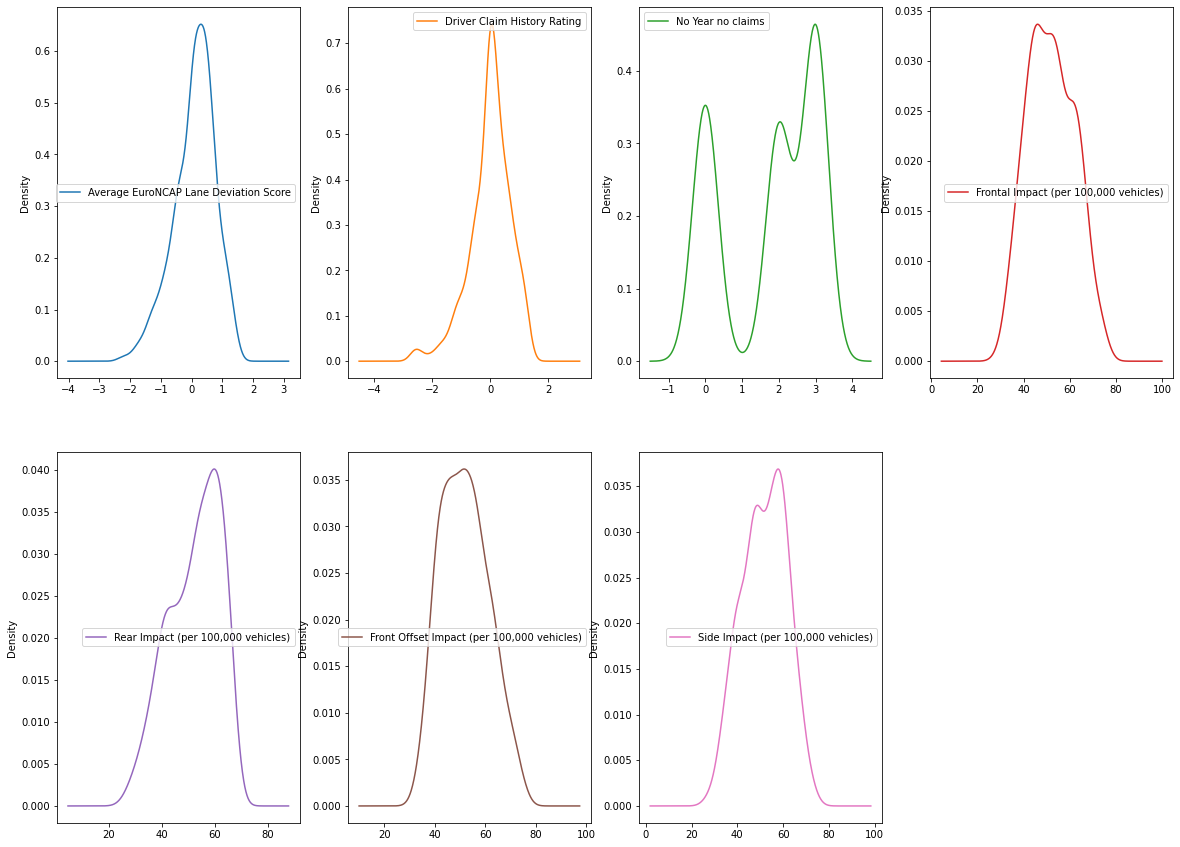

In [22]:
df.plot(kind='density', subplots=True, layout=(2,4), sharex=False,figsize = (20, 15))


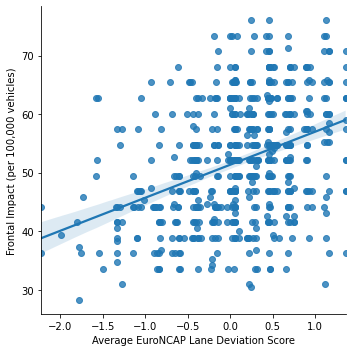

In [23]:
import seaborn as sns

sns.lmplot(x='Average EuroNCAP Lane Deviation Score', y='Frontal Impact (per 100,000 vehicles)', data=df)

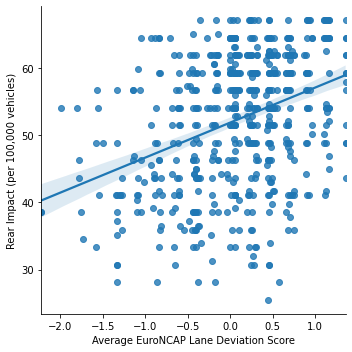

In [24]:
sns.lmplot(x='Average EuroNCAP Lane Deviation Score', y='Rear Impact (per 100,000 vehicles)', data=df)

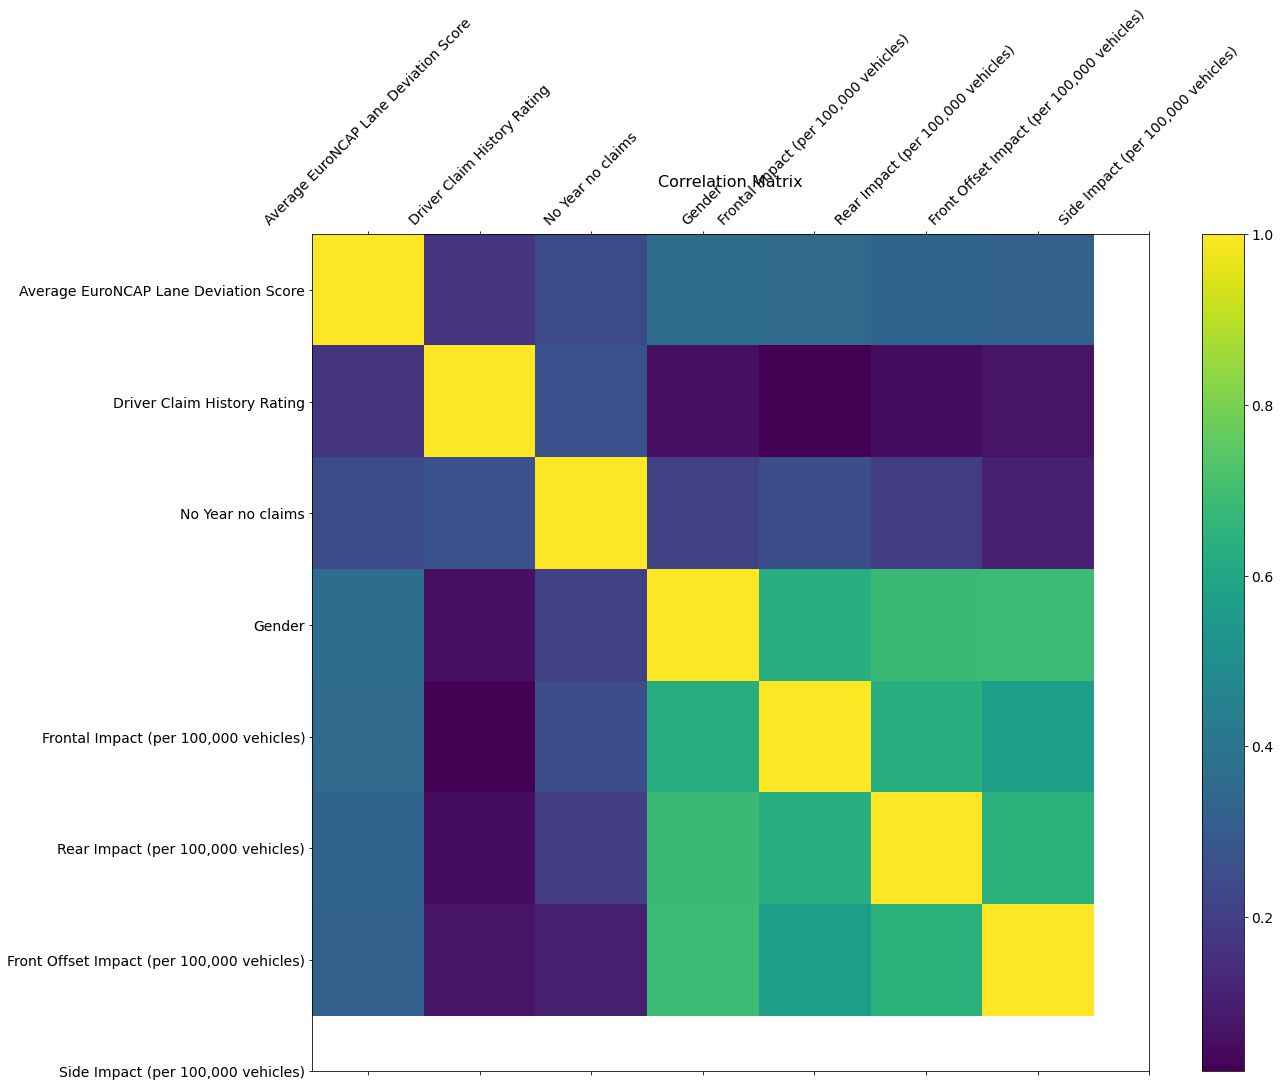

In [25]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [26]:
import numpy as np

rs = np.random.RandomState(0)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Average EuroNCAP Lane Deviation Score,Driver Claim History Rating,No Year no claims,"Frontal Impact (per 100,000 vehicles)","Rear Impact (per 100,000 vehicles)","Front Offset Impact (per 100,000 vehicles)","Side Impact (per 100,000 vehicles)"
Average EuroNCAP Lane Deviation Score,1.000000,0.171188,0.241446,0.373565,0.358877,0.337269,0.324627
Driver Claim History Rating,0.171188,1.000000,0.266628,0.060656,0.019449,0.053598,0.069826
No Year no claims,0.241446,0.266628,1.000000,0.206685,0.253586,0.196736,0.104932
"Frontal Impact (per 100,000 vehicles)",0.373565,0.060656,0.206685,1.000000,0.628591,0.679276,0.690693
"Rear Impact (per 100,000 vehicles)",0.358877,0.019449,0.253586,0.628591,1.000000,0.632666,0.569150
"Front Offset Impact (per 100,000 vehicles)",0.337269,0.053598,0.196736,0.679276,0.632666,1.000000,0.649526
"Side Impact (per 100,000 vehicles)",0.324627,0.069826,0.104932,0.690693,0.569150,0.649526,1.000000


In [27]:
df.columns

Index(['Average EuroNCAP Lane Deviation Score', 'Driver Claim History Rating',
       'No Year no claims', 'Gender', 'Frontal Impact (per 100,000 vehicles)',
       'Rear Impact (per 100,000 vehicles)',
       'Front Offset Impact (per 100,000 vehicles)',
       'Side Impact (per 100,000 vehicles)'],
      dtype='object')

### Regression 

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)

In [47]:
df.fillna(0,inplace=True)

In [53]:
from sklearn.preprocessing import StandardScaler

minmaxscaler = StandardScaler()
#X = minmaxscaler.fit_transform(df[['Average EuroNCAP Lane Deviation Score', 'Driver Claim History Rating','No Year no claims', 'Gender']])


X = df[['Average EuroNCAP Lane Deviation Score', 'Driver Claim History Rating','No Year no claims', 'Gender','Frontal Impact (per 100,000 vehicles)']]

In [54]:
X_ = pd.DataFrame(X,columns= ['Average EuroNCAP Lane Deviation Score', 'Driver Claim History Rating','No Year no claims', 'Gender','Frontal Impact (per 100,000 vehicles)'])

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_, df['Front Offset Impact (per 100,000 vehicles)'],test_size=0.33, random_state=42)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


lr = RandomForestRegressor()
lr.fit(X_train,y_train)

RandomForestRegressor()

In [57]:
from sklearn.metrics import r2_score

In [58]:
from sklearn.model_selection import cross_validate
scores = cross_validate(RandomForestRegressor(), X_train, y_train, cv=5, scoring='r2')

In [59]:
scores

{'fit_time': array([0.35448766, 0.29990745, 0.30781317, 0.20046473, 0.21520329]),
 'score_time': array([0.01562166, 0.01562047, 0.01196909, 0.00997353, 0.01562023]),
 'test_score': array([0.31528203, 0.32438164, 0.51598095, 0.47079884, 0.41938916])}

In [60]:
y_pred = lr.predict(X_test)

In [61]:
r2_score(y_test,y_pred)

0.30179897326532157

In [62]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error

print('Root mean square value of the linear regression model is' , sqrt(mean_squared_error(y_test,y_pred)))

Root mean square value of the linear regression model is 7.83919007517893


In [63]:
output = pd.DataFrame({'Test':y_test,'Prediction':y_pred})

In [64]:
output.index =  [i for i in range(1,len(y_test)+1)]

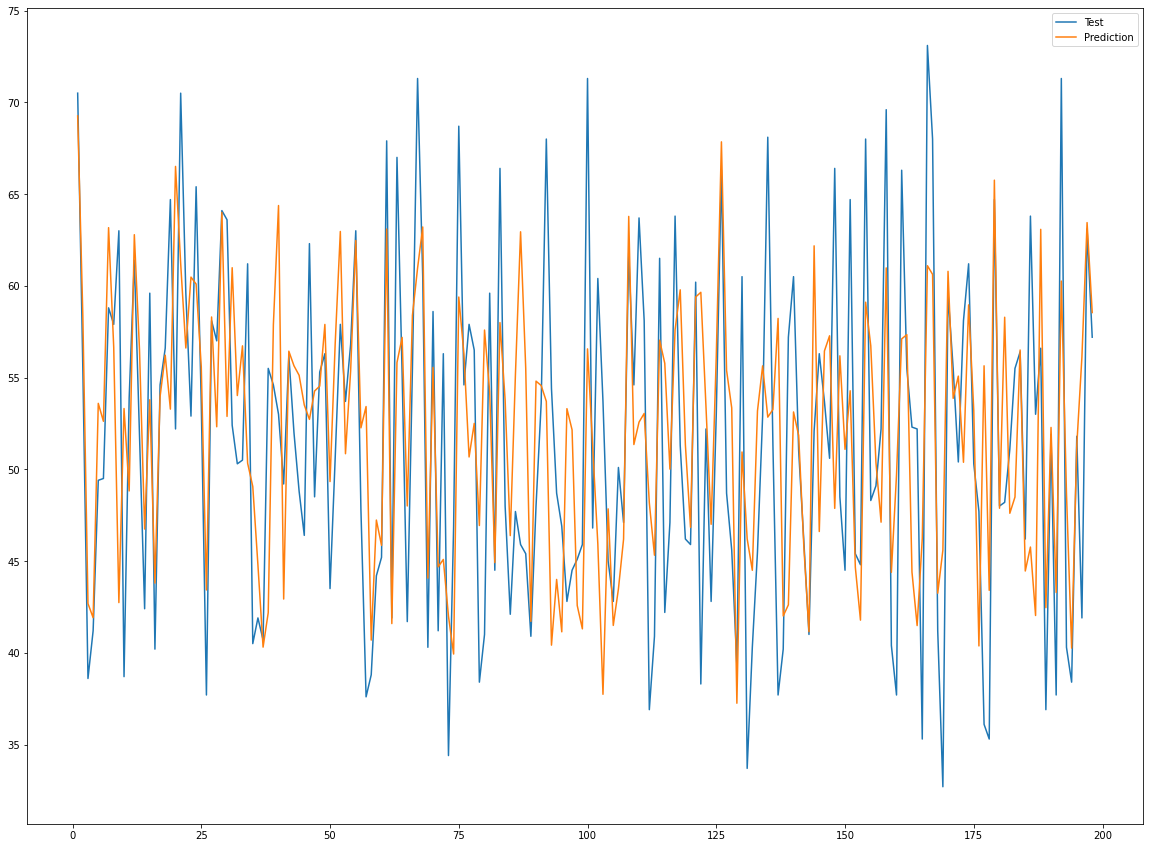

In [65]:
output.plot(figsize = (20, 15))

In [67]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))



ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [1]:
20/0

ZeroDivisionError: division by zero

In [2]:
0/20

0.0